## Importation des bibliothèques

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np

from tensorflow.keras import layers
import time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor





## Etape 1 : Chargement des données

In [91]:
#  Étape 1 : Chargement des données ===
file_path = "D:\\MEMO\\dataset\\archive\\kddcup.data_10_percent.gz" #chemin vers l'emplacement de notre fichier kddcup.data_10_percent
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted",
    "num_root", "num_file_creations", "num_shells", "num_access_files",
    "num_outbound_cmds", "is_host_login", "is_guest_login", "count",
    "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate",
    "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
    "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
    "dst_host_srv_serror_rate", "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate", "label"]

data = pd.read_csv(file_path, header=None, names=columns)
# Ajouter une colonne pour étiqueter les anomalies (1 pour anomalie, 0 pour normal)
data["is_anomaly"] = data["label"].apply(lambda x: 0 if x == "normal." else 1)

## Exploration des données 

In [93]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,is_anomaly
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,0
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,0
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,0
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,0


In [96]:
data.shape

(494021, 43)

In [98]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

## Étape 2 : Prétraitement des données

In [103]:
# === Étape 2 : Prétraitement des données ===
# Encoder les variables catégoriques
categorical_cols = ["protocol_type", "service", "flag"]
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Sélection des caractéristiques (exclusion des étiquettes)
features = data.drop(columns=["label", "is_anomaly"])
labels = data["is_anomaly"]

# Standardisation des données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [105]:
data.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_anomaly
count,494021.000000,494021.000000,494021.000000,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,0.467132,23.408894,7.842446,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,...,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412,0.803089
std,707.746472,0.575606,13.538332,2.250853,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,...,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140,0.397665
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,14.000000,9.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,14.000000,9.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,42.000000,9.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,58329.000000,2.000000,65.000000,10.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Étape 3 : Séparation des données

In [136]:
# === Étape 3 : Séparation des données ===
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# === Fonction utilitaire pour évaluer les modèles ===
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n=== Rapport pour {model_name} ===")
    print(classification_report(y_true, y_pred))

# Matrice de confusion
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomalie"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matrice de confusion : {model_name}")
    plt.show()
    
# Métriques supplémentaires
    fp = cm[0, 1]  # Faux positifs
    fn = cm[1, 0]  # Faux négatifs
    print(f"Taux de faux positifs : {fp / (fp + cm[0, 0]):.2f}")
    print(f"Taux de faux négatifs : {fn / (fn + cm[1, 1]):.2f}")

## Distribution des caractéristiques catégorielles

              precision    recall  f1-score   support

           0       0.18      0.86      0.29     19353
           1       0.46      0.03      0.06     79452

    accuracy                           0.19     98805
   macro avg       0.32      0.44      0.17     98805
weighted avg       0.41      0.19      0.10     98805

[[16618  2735]
 [77115  2337]]
=== Modèle : Isolation Forest ===

=== Rapport pour Isolation Forest ===
              precision    recall  f1-score   support

           0       0.17      0.80      0.29     19353
           1       0.61      0.08      0.14     79452

    accuracy                           0.22     98805
   macro avg       0.39      0.44      0.21     98805
weighted avg       0.53      0.22      0.17     98805



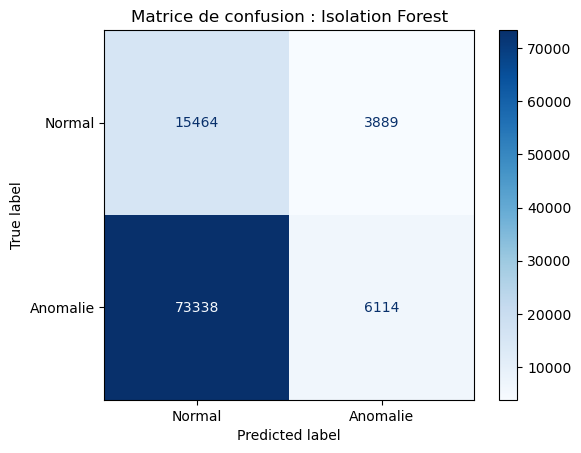

Taux de faux positifs : 0.20
Taux de faux négatifs : 0.92


In [138]:
# === Étape 4 : Modèles ===

# 1. Isolation Forest
# Ajustement de la fraction de contamination
iso_forest = IsolationForest(n_estimators=200, contamination=0.05, random_state=42)
iso_forest.fit(X_train)

# Prédictions
y_pred = iso_forest.predict(X_test)
y_pred = [1 if x == -1 else 0 for x in y_pred]

# Évaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print("=== Modèle : Isolation Forest ===")
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train)
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = np.where(y_pred_iso == 1, 0, 1)  # Convertir : 1 -> Normal, -1 -> Anomalie
evaluate_model(y_test, y_pred_iso, "Isolation Forest")

=== Modèle : PCA Robuste ===

=== Rapport pour PCA Robuste ===
              precision    recall  f1-score   support

           0       0.21      0.94      0.34     19353
           1       0.89      0.11      0.20     79452

    accuracy                           0.27     98805
   macro avg       0.55      0.53      0.27     98805
weighted avg       0.76      0.27      0.22     98805



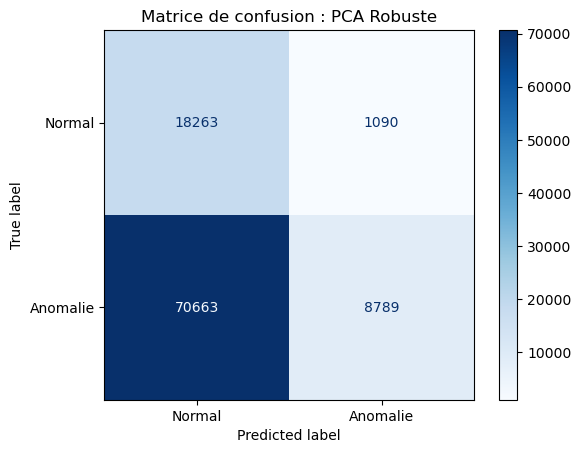

Taux de faux positifs : 0.06
Taux de faux négatifs : 0.89


In [116]:
# 2. PCA Robuste
print("=== Modèle : PCA Robuste ===")
pca = PCA(n_components=2)
pca_features_train = pca.fit_transform(X_train)
pca_features_test = pca.transform(X_test)
pca_scores = np.linalg.norm(pca_features_test, axis=1)
threshold = np.percentile(pca_scores, 90)  # Seuil à 90% des scores
y_pred_pca = (pca_scores > threshold).astype(int)
evaluate_model(y_test, y_pred_pca, "PCA Robuste")

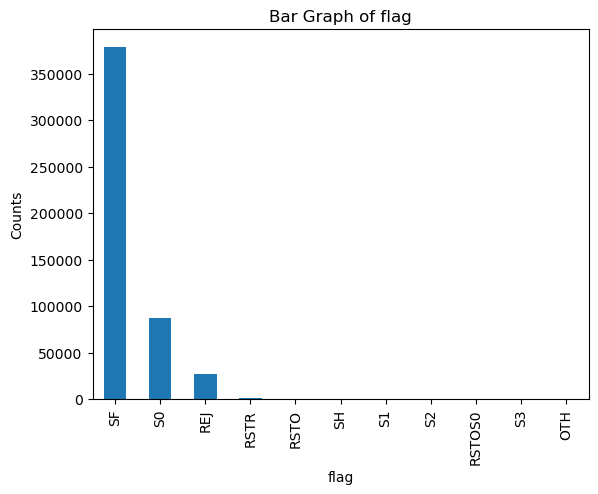

In [40]:
bar_graph('flag')

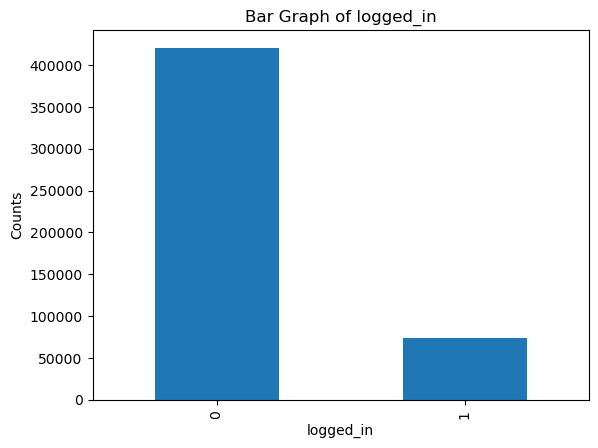

In [42]:
bar_graph('logged_in')

## Distribution des caractéristiques cibles